In [1]:
#/media/chen/新加卷/data_learn/tianchi_stround/da2
import pandas as pd
from dateutil.parser import parse 
import datetime
import numpy as np
import pylab as pl
def imp_dat():
	departure=pd.read_csv("//media//chen//新加卷//data_learn//tianchi_stround//da2//airport_gz_departure_chusai_2ndround.csv")
	flights=pd.read_csv("//media//chen//新加卷//data_learn//tianchi_stround//da2//airport_gz_flights_chusai_2ndround.csv")
	gates=pd.read_csv("//media//chen//新加卷//data_learn//tianchi_stround//da2//airport_gz_gates.csv")
	security_check=pd.read_csv("//media//chen//新加卷//data_learn//tianchi_stround//da2//airport_gz_security_check_chusai_2ndround.csv")
	wifi_records=pd.read_csv("//media//chen//新加卷//data_learn//tianchi_stround//da2//WIFI_AP_Passenger_Records_chusai_2ndround.csv")
	return departure,flights,gates,security_check,wifi_records

def mean_wifi(wifi_records):
	rlines=wifi_records['timeStamp'].values
	timeTen=[]
	timeStr=[]
	for i in rlines:
		timeTen.append(int(i[8:16].replace('-',''))/10*10)
		timeStr.append(i[:10])

	wifi_records['timeTen']=timeTen
	wifi_records['timeStr']=timeStr

	dfwftime=wifi_records.groupby(['WIFIAPTag','timeTen','timeStr'])
	dftenMean=dfwftime['passengerCount'].mean().reset_index()

	timeTen_str=dftenMean['timeTen'].values.astype(str)
	timeTen_str4=[]
	for i in timeTen_str:
			timeTen_str4.append(i[2:])
	dftenMean['timeTen_str']=timeTen_str
	dftenMean['timeTen_str4']=timeTen_str4

	slice10min=[]
	dftimeStr=dftenMean['timeStr'].values
	dftimeTen_str4=dftenMean['timeTen_str4'].values
	for i in xrange(dftimeStr.shape[0]):
		slice10min.append(dftimeStr[i]+'-'+dftimeTen_str4[i][:2]+'-'+dftimeTen_str4[i][2])
	dftenMean['slice10min']=slice10min

	#### delete the surperfluous data and show the "E1-1A-1<E1-1-01> "data

	wifi_all=dftenMean.drop(['timeTen','timeStr','timeTen_str','timeTen_str4'],axis=1)
	#wifi_all['timeTen_str4']=wifi_all['timeTen_str4'].astype(int)

	### 查看不同点的wifi数量

	df=wifi_all.groupby(['WIFIAPTag','slice10min'])
	rse=df.passengerCount.sum()
	wifi_all_split=rse.unstack().T
	return wifi_all_split

In [2]:
departure,flights,gates,security_check,wifi_records=imp_dat()
wifi_all_split=mean_wifi(wifi_records)

In [19]:
### 各个时间段的wifi连接情况

In [1]:
import os

In [2]:
os.getcwd()

'/media/chen/DATA/Anaconda2/code/Tianchi'

In [3]:
def getWIFIday11_24(wifi_all_split):    
    wifi_day=[]
    wifi_dayt=[]
    for i in range(10,26):
        tmp=[a  for a in wifi_all_split.index if a>='2016-09-'+str(i)+'-04-0' and a<='2016-09-'+str(i+1)+'-04-0']
        tmpt=[a  for a in wifi_all_split.index if a<='2016-09-'+str(i)+'-17-5' and a>='2016-09-'+str(i)+'-15-0']
        wifi_day.append(wifi_all_split.ix[tmp,:])
        wifi_dayt.append(wifi_all_split.ix[tmpt,:])
    return wifi_day,wifi_dayt
day25=[i  for i in wifi_all_split.index if i>='2016-09-25-04-0' and i<='2016-09-26-04-0']
day24=[i  for i in wifi_all_split.index if i>='2016-09-24-04-0' and i<='2016-09-25-04-0']
day23=[i  for i in wifi_all_split.index if i>='2016-09-23-04-0' and i<='2016-09-24-04-0']
day14=[i  for i in wifi_all_split.index if i>='2016-09-14-04-0' and i<='2016-09-15-04-0']
day25t=[i  for i in wifi_all_split.index if i<='2016-09-25-17-5' and i>='2016-09-25-15-0']
day24t=[i  for i in wifi_all_split.index if i<='2016-09-24-17-5' and i>='2016-09-24-15-0']
day23t=[i  for i in wifi_all_split.index if i<='2016-09-23-17-5' and i>='2016-09-23-15-0']
day14t=[i  for i in wifi_all_split.index if i<='2016-09-14-17-5' and i>='2016-09-14-15-0']
wifi_a25=wifi_all_split.ix[day25,:]
wifi_a24=wifi_all_split.ix[day24,:]
wifi_a23=wifi_all_split.ix[day23,:]
wifi_a14=wifi_all_split.ix[day14,:]
wifi_a25t=wifi_all_split.ix[day25t,:]
wifi_a24t=wifi_all_split.ix[day24t,:]
wifi_a23t=wifi_all_split.ix[day23t,:]
wifi_a14t=wifi_all_split.ix[day14t,:]

wifi_day,wifi_dayt=getWIFIday11_24(wifi_all_split)

In [4]:
def getwifiArea():
    wifiTag=wifi_day[1].columns
    wi_dic={}
    for a in wifiTag:
        b=a[:2]
        wi_dic[b]=wi_dic.get(b,[])+[a]
    return wi_dic

wi_dic=getwifiArea()

In [5]:
def getFla_gat(flights,gates):
	scheduled_flt=[parse(a)+datetime.timedelta(hours=8)  if type(a)==str else 0 for a in flights['scheduled_flt_time'].values]
	actual_flt=[parse(a)+datetime.timedelta(hours=8) if type(a)==str else 0  for a in flights['actual_flt_time'].values]
	flights['scheduled_flt'],flights['acutal_flt']=scheduled_flt,actual_flt

	flight_gate=pd.merge(flights,gates,on='BGATE_ID',how='left')
	oneDay_time=[str(a)[11:19] for a in flight_gate['scheduled_flt'].values]
	flight_gate['timeInDay']=oneDay_time

	late_timeAll=[]
	for i in range(flight_gate.shape[0]):
		if flight_gate.ix[i,5]!=0:
			late_timeAll.append(round((flight_gate.ix[i,5]-flight_gate.ix[i,4]).total_seconds(),0)/60)
		else:
			late_timeAll.append(-1)    
	flight_gate['late_time/min']=late_timeAll
	id_flt=[]
	for a in flight_gate.ix[:,['scheduled_flt','BGATE_ID']].astype(str).values:
		id_flt.append(a[0][-8:]+'_'+a[1])
	flight_gate['id_flt']=id_flt
	tmp=flight_gate
	del tmp['scheduled_flt_time']
	del tmp['actual_flt_time']
	return tmp
def separate_flight(flight_gate):
    all_=[]
    plane_fight_dic=[]
    for i in xrange(10,26):
        logi=[flight_gate.ix[a,'scheduled_flt']>=datetime.datetime(2016,9,i,4,0) and flight_gate.ix[a,'scheduled_flt']<datetime.datetime(2016,9,i+1,4,0)
              for a in xrange(flight_gate.shape[0])]
        ftmp=flight_gate[logi]
        tmp_dic={}
        for i in ftmp.ix[:,['flight_ID','id_flt']].values:
            tmp_dic[i[1]]=tmp_dic.get(i[1],[])+[i[0]]
        tmp_set=[]
        for i in ftmp['id_flt'].values:
            tmp_set.append(tmp_dic[i])
        ftmp['flt_set']=tmp_set
        all_.append(ftmp)
        plane_fight_dic.append(tmp_dic)
        
    return all_,plane_fight_dic

In [6]:
flight_gate=getFla_gat(flights,gates)

In [7]:
fl_gt,plane_flight_dic=separate_flight(flight_gate)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
res=np.load("res_new.npy")

In [9]:
def sec_fg_change(res,day,plane_flight_dic):
    mm=day-10
    fasd=res[0][mm].ix[:,['flight_ID','acutal_flt']].drop_duplicates().set_index('flight_ID')
    res_cum=res[0][mm].groupby(['secTime','id_flt']).size().unstack().resample('10T').sum().fillna(0).cumsum()
    index = pd.date_range('9/'+str(day)+'/2016 04:00:00', periods=144, freq='10T')
    res_cum=res_cum.reindex(index)
    all_=[]
    tmp_dic=plane_flight_dic[mm]
    for i in xrange(res_cum.shape[1]):
        tmp=[]
        fID=res_cum.columns[i]#id_flt,eg:'00:20:00_A116'
        for ai in tmp_dic[fID]:
            if ai in fasd.index:
                flig_ID=ai
        fTime=fasd.ix[flig_ID,:].values[0]
        for i in res_cum.ix[:,i].reset_index().values:
            if type(fTime)!=float and i[0]<fTime:
                tmp.append(i[1])
            else:
                tmp.append(0)
        all_.append(tmp) 
    df_=pd.DataFrame(np.array(all_),index=res_cum.columns,columns=res_cum.index).T
    return df_

In [10]:
def getCoeff(area='E1'):
    XX=[]
    YY=[]
    for day in xrange(11,25):
        mm=day-10
        rescum12=sec_fg_change(res,day,plane_flight_dic)
        rescum12_E1=rescum12.ix[:,res[1][mm][area]].fillna(0)
        from sympy.abc import *
        par_abc=[ a,b,c,d,e,f,g,h,i,j,k, l, m, n, o, p, q, r, s, t, u, v, w, x, y]
        rescum12_E1_prm=multi_parm(rescum12_E1)
    
        rescum12Facotr=factorMatrix(rescum12_E1_prm.sum(axis=1))#factors
        x_=rescum12Facotr
        y_=wifi_day[mm].ix[:,wi_dic[area]].sum(axis=1).values[1:]
        XX=XX+x_.tolist()
        YY=YY+y_.tolist()
    return XX,YY

<ipython-input-10-bd41785f0079>:1: SyntaxWarning: import * only allowed at module level
  def getCoeff(area='E1'):


In [16]:
XX,YY=getCoeff(area="W1")

In [17]:
xx_yy=(XX,YY)

In [18]:
np.save('XX_YY_W1.npy',xx_yy)

In [19]:
day=11
mm=day-10
area='E1'
rescum12=sec_fg_change(res,day,plane_flight_dic)
rescum12_E1=rescum12.ix[:,res[1][mm][area]].fillna(0)

In [23]:
from sklearn.linear_model import LinearRegression
clf_lr=LinearRegression()

In [31]:
def dataTogate(area="E1",day=11):
    mm=day-10
    rescum12=sec_fg_change(res,day,plane_flight_dic)
    rescum12_E1=rescum12.ix[:,res[1][mm][area]].fillna(0)
    XX,YY=np.load('XX_YY_'+area+'.npy')
    clf_lr.fit(XX[:1440],YY[:1440])
    par_abc=clf_lr.coef_.tolist()
    res_data=multi_parm(rescum12_E1)
    res_dataStack=res_data.unstack().reset_index()
    bgate=[]
    for i in res_dataStack['id_flt'].values:
        bgate.append(i.split('_')[-1])
    res_dataStack['bgate']=bgate
    res_unstack=res_dataStack.groupby(['level_1','bgate']).sum().unstack()[0]
    return res_unstack

In [32]:
clf_lr.fit(XX[:1440],YY[:1440])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
dataTogate().tail()

bgate,A01,A02,A03,A04,A05,A101,A102,A103,A104,A105,A106,A107,A108,A109,A110,A111
level_1,,,,,,,,,,,,,,,,
2016-09-12 03:10:00,0.0,0.0,0.0,0.0,0.936396,0.0,0.0,0.0,0.0,0.377437,0.448443,0.0,-0.113394,0.0,0.0,0.0
2016-09-12 03:20:00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.981292,-0.257794,0.0,-0.098905,0.0,0.0,0.0
2016-09-12 03:30:00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.224855,0.0,0.315764,0.0,0.0,0.0
2016-09-12 03:40:00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.717869,0.0,0.820950,0.0,0.0,0.0
2016-09-12 03:50:00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.866379,0.0,0.000000,0.0,0.0,0.0


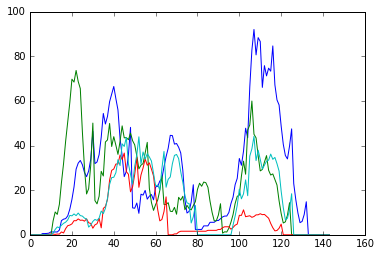

In [400]:
pl.plot(dataTogate(day=11).ix[:,'A01'].values)
pl.plot(dataTogate(day=12).ix[:,'A01'].values)
pl.plot(dataTogate(day=13).ix[:,'A01'].values)
pl.plot(dataTogate(day=14).ix[:,'A01'].values)
pl.show()

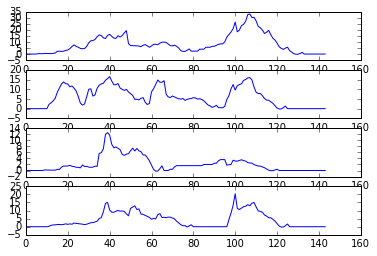

In [36]:
pl.subplot(411)
pl.plot(dataTogate(day=11).ix[:,'A01'].values)
pl.subplot(412)
pl.plot(dataTogate(day=12).ix[:,'A01'].values)
pl.subplot(413)
pl.plot(dataTogate(day=13).ix[:,'A01'].values)
pl.subplot(414)
pl.plot(dataTogate(day=14).ix[:,'A01'].values)
pl.show()

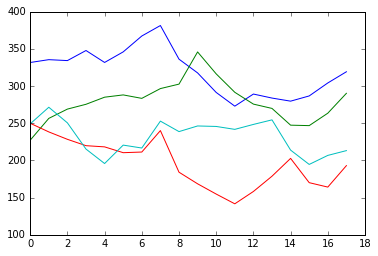

In [408]:
pl.plot(dataTogate(day=12).sum(axis=1).values[66:84])
pl.plot(dataTogate(day=13).sum(axis=1).values[66:84])
pl.plot(dataTogate(day=14).sum(axis=1).values[66:84])
pl.plot(dataTogate(day=15).sum(axis=1).values[66:84])
pl.show()

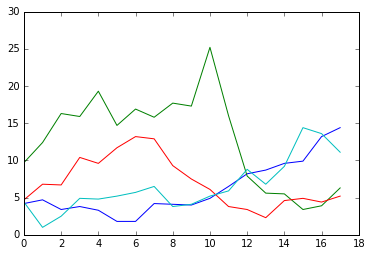

In [37]:
pl.plot(wifi_day[2].ix[:,1].values[66:84])
pl.plot(wifi_day[3].ix[:,1].values[66:84])
pl.plot(wifi_day[4].ix[:,1].values[66:84])
pl.plot(wifi_day[5].ix[:,1].values[66:84])
pl.show()

In [311]:
syms=[]
for i in xrange(40):
    syms.append('a_'+str(i))
par_abc=sympy.symbols(syms)

In [26]:
import sympy
from sympy.abc import *
syms=[]
for i in xrange(25):
    syms.append('a_'+str(i))
par_abc=sympy.symbols(syms)
#par_abc=[ a,b,c,d,e,f,g,h,i,j,k, l, m, n, o, p, q, r, s, t, u, v, w, x, y]
def multi_parm(df):
	allParme=[]
	parmes=np.array(par_abc+[0.4]*150)
	for jj in range(df.shape[1]):
		dat=[]
		kk=0
		for ii in range(df.shape[0]-1,-1,-1):        
			if df.ix[ii,jj]!=0:
				dat.append(df.ix[ii,jj]*parmes[kk])
				kk=kk+1
			else:
				dat.append(0)
		dat.reverse()
		allParme.append(dat)
	return pd.DataFrame(allParme,index=df.columns,columns=df.index).T

def getFactor(spy,parms=par_abc):
    if type(spy)!=type(1*a) and type(spy)!=type(1*a+3*b):
        return np.array([0]*25)
    if spy.is_Add is False:
        tmp=[]
        for j in parms:
            tmp.append(int(spy.coeff(j)))
        return np.array(tmp)    
    args=spy.args
    num_list=np.array([0]*25)
    for i in args:
        tmp=[]
        for j in parms:
            tmp.append(int(i.coeff(j)))
        num_list=num_list+np.array(tmp)        
    return np.array(num_list)

def factorMatrix(p1):
    tmp=[]
    for i in p1:
        tmp.append(getFactor(i))
    return np.array(tmp)    

In [80]:
a,b,c,d,e,f,g,h,i,j,k, l, m, n, o, p, q, r, s, t, u, v, w, x, y=-5.02237765e-02,-6.12076564e-02,-5.95681529e-02,-9.71445147e-17,-2.75578958e-02,1.81351769e-02,7.20647286e-02,1.17688079e-01,1.48106019e-01,1.49128794e-01,1.59051660e-01,1.61608627e-01,1.60593699e-01,1.54939746e-01,1.77583287e-01,2.09299303e-01,2.71817303e-01,3.30251103e-01,3.98328330e-01,4.54076074e-01,4.54955836e-01,4.69440288e-01,4.90823422e-01,5.76177158e-01,7.73396286e-01
tmp_mulParm=multi_parm(res12_gate)

#### LSTM

In [38]:
import keras

Using Theano backend.


In [41]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [42]:
model=Sequential()
model.add(LSTM())

TypeError: __init__() takes at least 2 arguments (1 given)